In [1]:
import pandas as pd

df = pd.read_csv( "pokemon.csv", header = 0)
#df

training = pd.read_csv("pokemon2.csv", header = 0)
training = training.iloc[800:]


In [2]:
from sklearn.model_selection import train_test_split
against_columns = [col for col in df.columns if col.startswith('against_')]
x = df[against_columns]
y = df['type1']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33)


In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=.01)
clf = clf.fit(x_train, y_train)



In [4]:

y_test

199     ghost
7       water
558      dark
181     grass
288    normal
        ...  
733    normal
349     water
290       bug
412       bug
406     grass
Name: type1, Length: 265, dtype: object

In [5]:
predictions = clf.predict(x_test)
predictions

array(['ghost', 'water', 'fighting', 'grass', 'normal', 'rock', 'fairy',
       'ground', 'normal', 'grass', 'dark', 'water', 'electric', 'dragon',
       'dragon', 'bug', 'rock', 'fighting', 'rock', 'normal', 'poison',
       'ground', 'grass', 'steel', 'bug', 'water', 'ghost', 'fairy',
       'ice', 'water', 'normal', 'bug', 'normal', 'grass', 'fire',
       'grass', 'grass', 'poison', 'normal', 'psychic', 'normal',
       'normal', 'normal', 'steel', 'rock', 'bug', 'water', 'rock', 'ice',
       'dragon', 'fairy', 'water', 'dark', 'water', 'grass', 'dark',
       'steel', 'ground', 'ghost', 'fighting', 'psychic', 'grass',
       'grass', 'grass', 'fire', 'ground', 'normal', 'steel', 'water',
       'water', 'normal', 'fairy', 'dark', 'electric', 'steel',
       'electric', 'grass', 'water', 'psychic', 'normal', 'normal',
       'ghost', 'poison', 'bug', 'rock', 'grass', 'fire', 'normal',
       'normal', 'dragon', 'grass', 'ground', 'water', 'fighting',
       'normal', 'normal', 'w

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


0.8603773584905661

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']
)

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,
         2,  1],
       [ 0,  8,  1,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  6,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         3,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  1,  0,  1,  1,
         0,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  1,  0,
         0,  0],
       [ 0,  0,  0,  

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']))

              precision    recall  f1-score   support

         bug       0.95      0.76      0.84        25
        dark       0.73      0.67      0.70        12
      dragon       0.57      1.00      0.73         4
    electric       1.00      0.60      0.75        10
       fairy       1.00      1.00      1.00         8
    fighting       0.86      0.75      0.80         8
        fire       0.92      0.75      0.83        16
      flying       0.00      0.00      0.00         1
       ghost       0.75      0.90      0.82        10
       grass       0.89      1.00      0.94        33
      ground       1.00      0.82      0.90        11
         ice       0.57      0.67      0.62         6
      normal       0.98      1.00      0.99        42
      poison       1.00      0.60      0.75        15
     psychic       0.79      0.85      0.81        13
        rock       0.75      1.00      0.86         9
       steel       0.54      0.78      0.64         9
       water       0.86    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


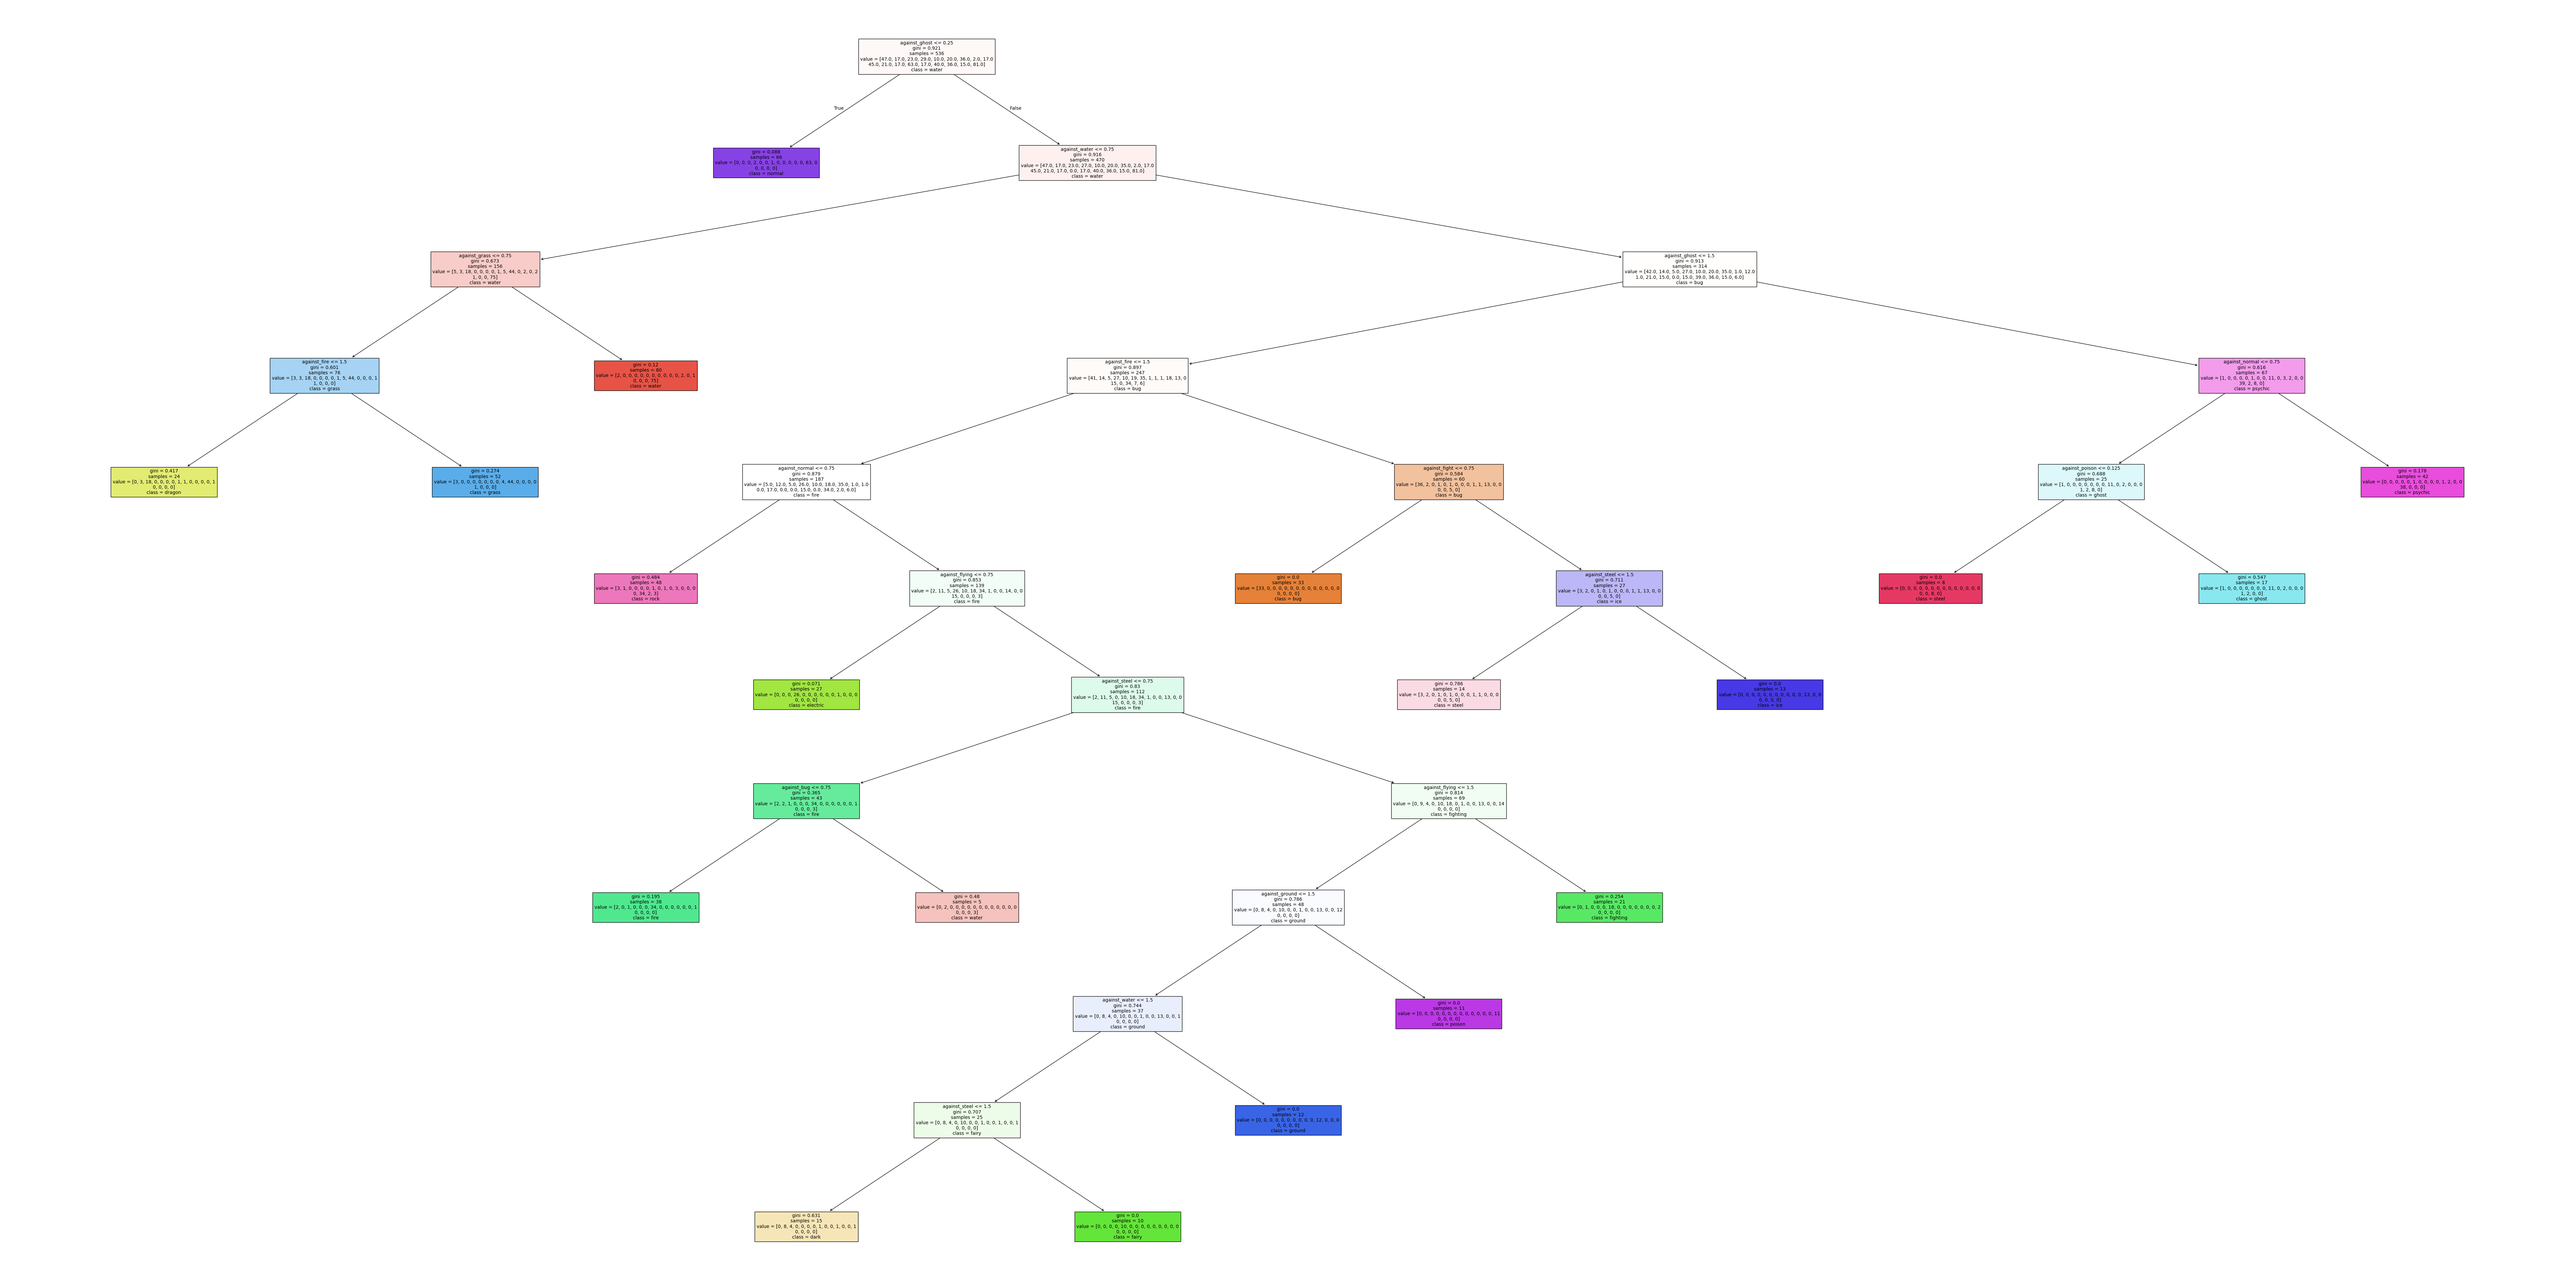

In [9]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize =(100,50))
_ = tree.plot_tree(clf, 
                   feature_names= x.columns, 
                   class_names={0:'bug', 1: 'dark',2: 'dragon', 3:'electric', 4:'fairy', 5:'fighting', 6:'fire', 7:'flying', 8:'ghost', 9:'grass', 10:'ground', 11:'ice', 12:'normal', 13:'poison', 14:'psychic', 15:'rock', 16:'steel', 17:'water'},
                   filled = True,
                   fontsize=10)

In [10]:


columns_to_keep = [
    'attack', 'sp_attack', 'defense', 'speed', 'hp', 'sp_defense', 'is_legendary', 'weight_kg', 'base_total', 'generation'
]
x2 = df[columns_to_keep]
y2 = df['type1']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=.40)


clf2 = DecisionTreeClassifier(max_depth=9)
clf2 = clf2.fit(x2_train, y2_train)

predictions2 = clf2.predict(x2_test)

accuracy_score(y2_test, predictions2)








0.1588785046728972

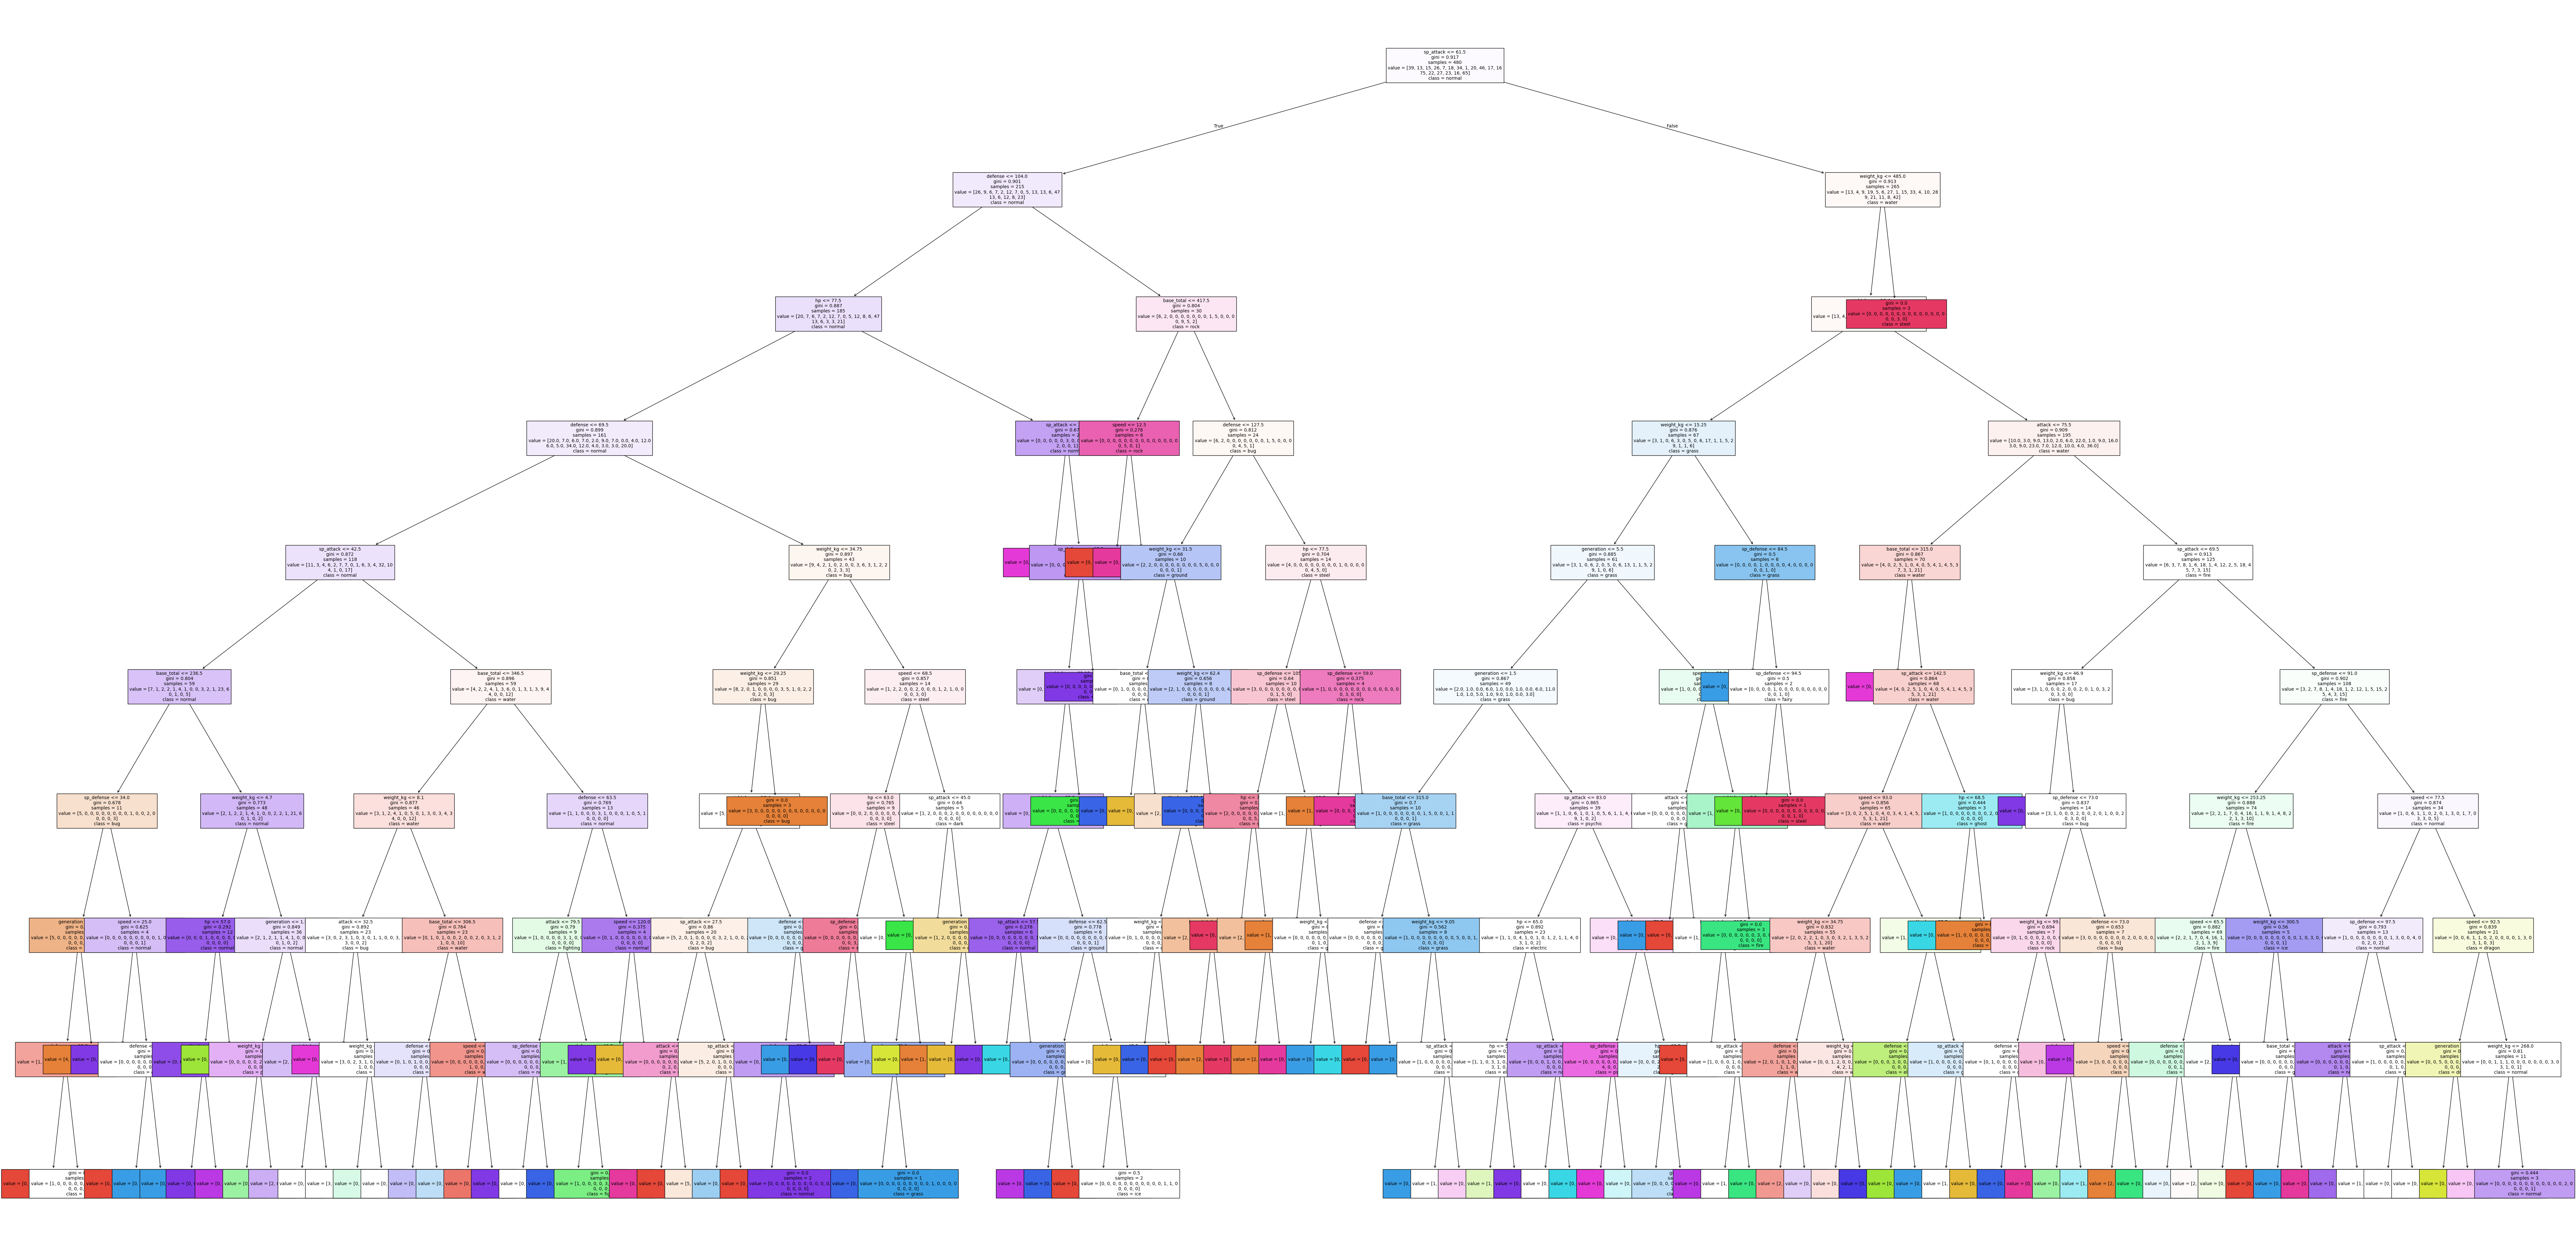

In [11]:


fig = plt.figure(figsize =(100,50))
_ = tree.plot_tree(clf2, 
                   feature_names= x2.columns, 
                   class_names={0:'bug', 1: 'dark',2: 'dragon', 3:'electric', 4:'fairy', 5:'fighting', 6:'fire', 7:'flying', 8:'ghost', 9:'grass', 10:'ground', 11:'ice', 12:'normal', 13:'poison', 14:'psychic', 15:'rock', 16:'steel', 17:'water'},
                   filled = True,
                   fontsize=10)